In [44]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime 
from datetime import date, timedelta
import matplotlib.pyplot as plt

today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

ibm = yf.download('IBM', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

ibm.dropna(how="any")
ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-15,147.110001,147.850006,145.529999,145.990005,140.414551,6231400
2023-09-18,145.770004,146.479996,145.059998,145.089996,139.548920,2508100
2023-09-19,145.000000,146.720001,144.660004,146.520004,140.924316,3945400
2023-09-20,148.360001,151.929993,148.130005,149.830002,144.107895,9632400
2023-09-21,149.000000,149.250000,147.309998,147.380005,141.751465,4944600


<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

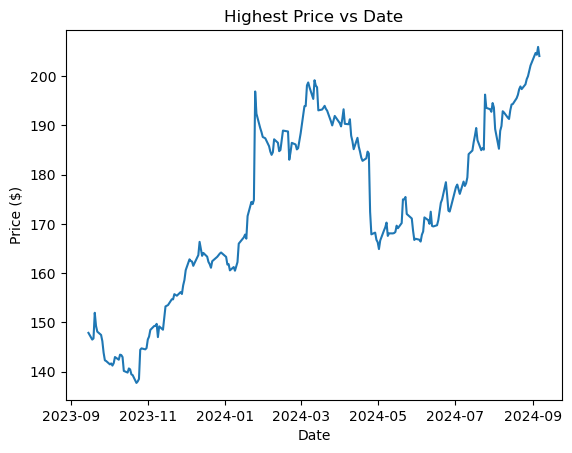

In [46]:
plt.plot(ibm.index,ibm["High"])
plt.title("Highest Price vs Date")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

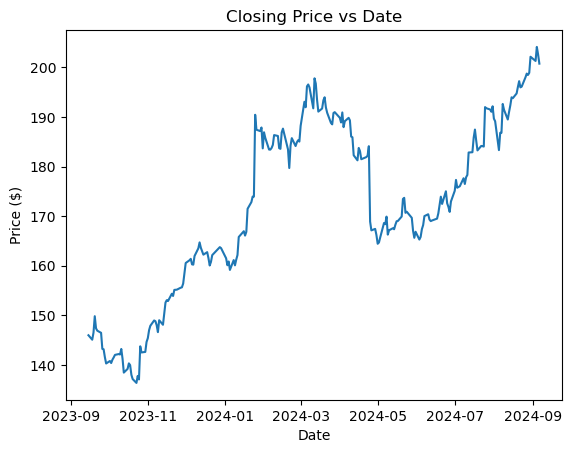

In [47]:
plt.plot(ibm.index,ibm["Close"])
plt.title("Closing Price vs Date")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt

In [48]:
def percentage_change(open,close):
    return ((close - open) / open) * 100

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

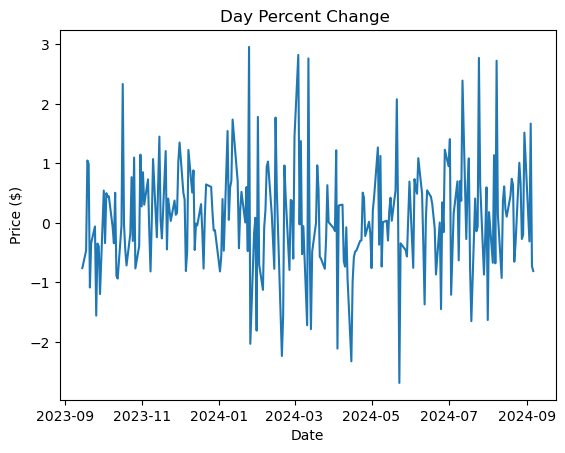

In [49]:
plt.plot(ibm.index,percentage_change(ibm["Open"],ibm["Close"]))
plt.title("Day Percent Change ")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt

Text(0.5, 1.0, '+ve vs -ve market close')

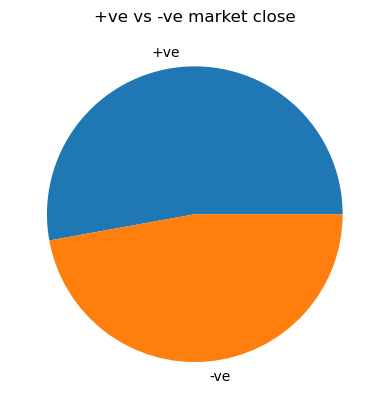

In [50]:
changedata = np.where(ibm["Open"]<ibm["Close"],"+ve","-ve")
data = np.array(np.unique(changedata,return_counts=True))
data = data.transpose()

data_dict = {}

for row in range(data.shape[0]):
    data_dict[data[row, 0].astype(str)] = int(data[row, 1])

plt.pie(data_dict.values(), labels=data_dict.keys())
plt.title("+ve vs -ve market close")

Text(0.5, 1.0, 'Volume Traded Daily')

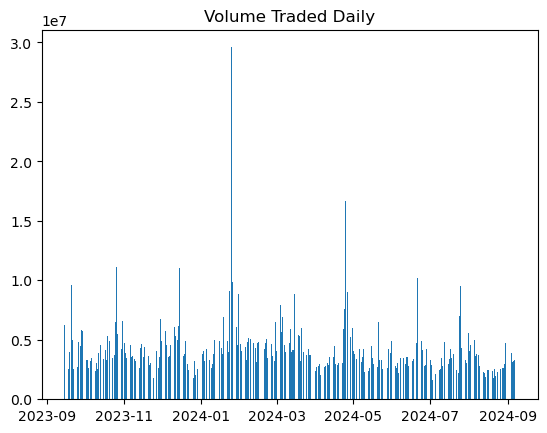

In [72]:
plt.bar(ibm.index,ibm["Volume"])
plt.title("Volume Traded Daily")